# Project 3 (Part 3) - Romance vs Horror Reddit Classification (Preprocessing)

## Processes covered in this notebook

1. [Importing of datasets](#Importing-of-datasets)
2. [Train Test Split](#Train-Test-Split)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Romance WordCloud](#Romance-WordCloud)
5. [Horror WordCloud](#Horror-WordCloud)

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import word_tokenize

## Importing of datasets

In [2]:
df = pd.read_csv('../datasets/horror&romance.csv')

In [3]:
df.head()

,selftext,subreddit
0,1. 500 Word Limit. All stories must be 500 wor...,shortscarystories
1,I was sitting on the soft snow with a blanket ...,shortscarystories
2,But the hatred that fills the room whenever he...,shortscarystories
3,I woke up hungry this morning. I've been sick ...,shortscarystories
4,I had seen school shootings on television in t...,shortscarystories


## Train Test Split

In [4]:
X = df['selftext']
y = df['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=7)

In [6]:
#Checking strafication

print (y_train.value_counts(normalize=True)*100)

shortscarystories    53.319058
romance              46.680942
Name: subreddit, dtype: float64


## Exploratory Data Analysis

_Our exploratory analysis is an iterative process and throughout the iterations, one of the parameters we kept revisiting is issue of stopwords._

_In one of the iterations of the exploratory process, the words 'don', 'like', 'just' & 'time' appears in both sets of texts a significant number of times and we included them in the stopwords to drop them as we felt that these words would be of no value to either targets._

_Also, when running the models, we updated the stopwords with the words which were brought to our attention by the warnings of the models._

In [7]:
# This is an iterative process where we come back to add in stopwords which were lacking 
# (warned by system in a previous iteration + through EDA)

updated_stop_words = text.ENGLISH_STOP_WORDS.union(['don', 'like', 'just', 'time', 'abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv', 'el', 'le', 'plea', 'u', 'anywh', 'becau', 'elsewh', 'everywh', 'ind', 'otherwi', 'somewh'])

In [8]:
from wordcloud import WordCloud

In [9]:
# Using word count to have an initial basic understanding of the text

cvec_rom = CountVectorizer(analyzer='word', token_pattern=(r'\w{2,}'), stop_words=updated_stop_words, max_df=0.9, min_df=3)
cvec_horror = CountVectorizer(analyzer='word', token_pattern=(r'\w{2,}'), stop_words=updated_stop_words, max_df=0.9, min_df=3)

In [10]:
# Splitting training dataset to help visualize the most common words

romance = X_train[y_train == 'romance']
horror = X_train[y_train == 'shortscarystories']

In [11]:
rom = cvec_rom.fit_transform(romance)
hor = cvec_horror.fit_transform(horror)

In [12]:
df_cvec_rom = pd.DataFrame(rom.toarray(), columns=cvec_rom.get_feature_names())
df_cvec_horror = pd.DataFrame(hor.toarray(), columns=cvec_horror.get_feature_names())

In [13]:
pd.DataFrame(df_cvec_horror.sum(axis=0).sort_values(ascending=False).head(3), columns=['Count of Word'])

,Count of Word
eyes,525
know,463
door,458


In [14]:
pd.DataFrame(df_cvec_rom.sum(axis=0).sort_values(ascending=False).head(3), columns=['Count of Word'])

,Count of Word
know,493
love,468
really,405


As we can see, the top 3 word counts for Horror themed texts are:
1. eyes
2. know
3. door

While the top 3 word counts for Romance themed texts are:
1. know
2. love
3. really

## Romance WordCloud

In [15]:
# Combining all strings for wordcloud
romance_comb = ' '

for i in romance:
    romance_comb = romance_comb + i + ' '

In [16]:
rom_wordcloud = WordCloud(width = 2000, height = 2000, 
                background_color ='white', 
                colormap = 'Dark2',
                stopwords = updated_stop_words, 
                min_font_size = 10).generate(romance_comb)

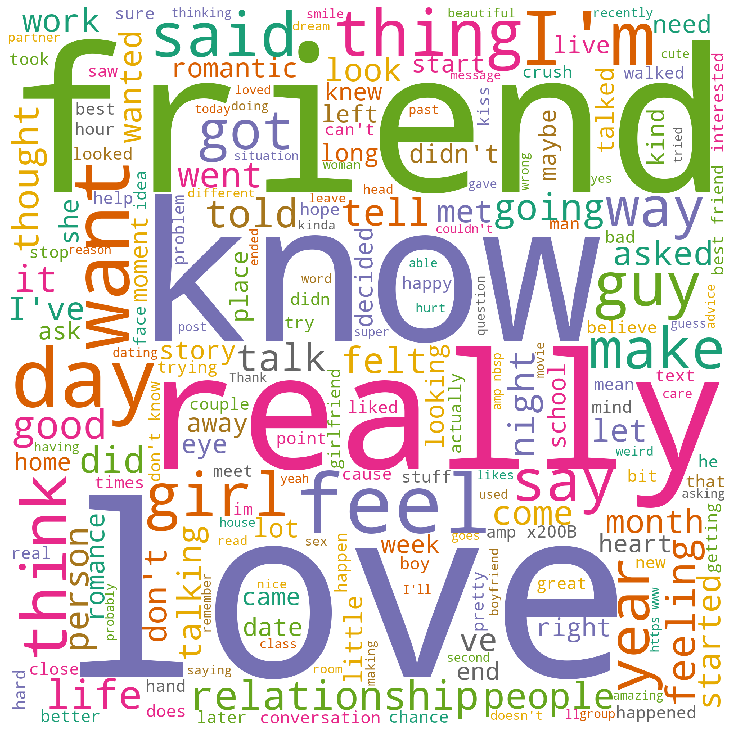

In [17]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(rom_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
#plt.savefig('../images/romance-wordcloud.jpg')
  
plt.show()

## Horror WordCloud

In [18]:
# Combining all strings for wordcloud
horror_comb = ' '

for i in horror:
    horror_comb = horror_comb + i + ' '

In [19]:
horror_wordcloud = WordCloud(width = 2000, height = 2000,
                background_color ='white', 
                colormap = 'brg',
                stopwords = updated_stop_words, 
                min_font_size = 10).generate(horror_comb)

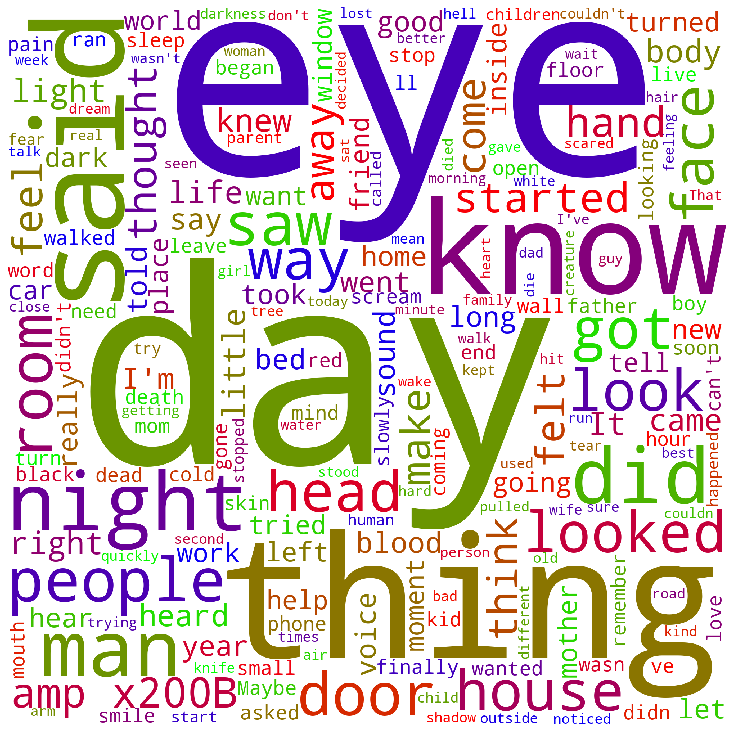

In [20]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(horror_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
#plt.savefig('../images/horror-wordcloud.jpg')

plt.show()